In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
chemicals_df = pd.read_csv("cscpopendata.csv")

#### Example of questions: 
##### Which category contains most of the products that have been discontinued? 
##### Which chemicals are more present per product category? 
##### Which companies have discontinued products and which ones haven’t at all? 

In [13]:
chemicals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CDPHId                  114635 non-null  int64  
 1   ProductName             114635 non-null  object 
 2   CSFId                   80662 non-null   float64
 3   CSF                     80237 non-null   object 
 4   CompanyId               114635 non-null  int64  
 5   CompanyName             114635 non-null  object 
 6   BrandName               114408 non-null  object 
 7   PrimaryCategoryId       114635 non-null  int64  
 8   PrimaryCategory         114635 non-null  object 
 9   SubCategoryId           114635 non-null  int64  
 10  SubCategory             114635 non-null  object 
 11  CasId                   114635 non-null  int64  
 12  CasNumber               108159 non-null  object 
 13  ChemicalId              114635 non-null  int64  
 14  ChemicalName        

In [17]:
chemicals_df.shape

(114635, 22)

In [51]:
print(chemicals_df["PrimaryCategory"].nunique())
print(chemicals_df["PrimaryCategory"].unique())

13
['Makeup Products (non-permanent)' 'Hair Care Products (non-coloring)'
 'Nail Products' 'Personal Care Products' 'Sun-Related Products'
 'Bath Products' 'Skin Care Products ' 'Fragrances'
 'Tattoos and Permanent Makeup' 'Hair Coloring Products'
 'Oral Hygiene Products' 'Shaving Products' 'Baby Products']


In [87]:
chemicals_df

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114630,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65001.0,Rosa Soft,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68059,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114631,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65002.0,Malva Spirit,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68060,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114632,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65003.0,Rojo Fashion,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68061,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114633,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65004.0,Terra Mystic,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68062,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1


### Starting Cleaning the data

In [112]:
newc_df=chemicals_df.drop(columns=["CSFId","CSF"]).copy()

In [116]:
newc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   CDPHId                  114635 non-null  int64 
 1   ProductName             114635 non-null  object
 2   CompanyId               114635 non-null  int64 
 3   CompanyName             114635 non-null  object
 4   BrandName               114408 non-null  object
 5   PrimaryCategoryId       114635 non-null  int64 
 6   PrimaryCategory         114635 non-null  object
 7   SubCategoryId           114635 non-null  int64 
 8   SubCategory             114635 non-null  object
 9   CasId                   114635 non-null  int64 
 10  CasNumber               108159 non-null  object
 11  ChemicalId              114635 non-null  int64 
 12  ChemicalName            114635 non-null  object
 13  InitialDateReported     114635 non-null  object
 14  MostRecentDateReported  114635 non-n

In [130]:
cols2see=["DiscontinuedDate","CDPHId","PrimaryCategory"]

newc_df[cols2see].groupby("PrimaryCategory").count()

,DiscontinuedDate,CDPHId
PrimaryCategory,,
Baby Products,11,49
Bath Products,556,3466
Fragrances,125,654
Hair Care Products (non-coloring),341,1620
Hair Coloring Products,431,2061
Makeup Products (non-permanent),8367,75827
Nail Products,764,15347
Oral Hygiene Products,27,525
Personal Care Products,263,765


In [132]:
cols2see=["DiscontinuedDate","CDPHId","CompanyId"]

newc_df[cols2see].groupby("CompanyId").count()

,DiscontinuedDate,CDPHId
CompanyId,,
4,363,762
11,13,252
12,0,7
18,0,168
20,0,5
...,...,...
1377,0,196
1379,0,26
1388,0,13


In [215]:
chemicals_df[~chemicals_df['DiscontinuedDate'].isna()].sample(20)

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
41393,14604,EYE AND LIP CONTOUR CREAM,NaN,NaN,127,"Shiseido America, Inc.",SHISEIDO FUTURE SOLUTION,90,Skin Care Products,92,...,13463-67-7,22361,Titanium dioxide,07/07/2010,09/10/2014,01/01/2014,07/07/2010,08/04/2014,NaN,1
71985,26232,CoverGirl Advanced Radiance Make-Up + Sunscreen,39577.0,Classic Ivory,86,The Procter & Gamble Company,CoverGirl,106,Sun-Related Products,107,...,13463-67-7,41287,Titanium dioxide,05/13/2015,10/12/2018,10/02/2016,05/13/2015,05/13/2015,NaN,1
76090,27386,CoverGirl Queen Stay Luscious Lipstick,42288.0,Passion,86,The Procter & Gamble Company,CoverGirl,44,Makeup Products (non-permanent),53,...,13463-67-7,44351,Titanium dioxide,12/15/2015,10/11/2018,10/02/2016,12/15/2015,12/15/2015,NaN,1
76540,27599,Wella Professionals Color Touch Special Mix De...,42551.0,0/45 Red Red-Violet,86,The Procter & Gamble Company,Wella,32,Hair Coloring Products,35,...,13463-67-7,44780,Titanium dioxide,01/27/2016,10/19/2018,10/02/2016,01/27/2016,01/27/2016,NaN,1
60100,21955,CoverGirl Outlast Stay Brilliant Nail Gloss,42417.0,Rose Gold,86,The Procter & Gamble Company,CoverGirl,59,Nail Products,65,...,13463-67-7,44465,Titanium dioxide,01/02/2014,10/11/2018,10/02/2016,01/07/2016,01/07/2016,NaN,1
42838,15090,Virtually Weightless Colour-adjusting Foundation,21121.0,Shade Dark,562,The Boots Company PLC,Boots Botanics,44,Makeup Products (non-permanent),50,...,13463-67-7,23123,Titanium dioxide,08/19/2010,10/16/2013,10/16/2013,08/19/2010,08/19/2010,NaN,1
35725,12266,Diamond Lip Gloss,17716.0,Princess,556,Victoria's Secret Beauty,Victoria's Secret Beauty,44,Makeup Products (non-permanent),52,...,13463-67-7,18468,Titanium dioxide,06/11/2010,12/06/2013,04/01/2007,06/11/2010,12/06/2013,NaN,1
25271,7088,Eye contour,NaN,NaN,301,Yves Rocher Inc.,Yria,44,Makeup Products (non-permanent),46,...,13463-67-7,11103,Titanium dioxide,11/19/2009,11/08/2013,11/22/2010,11/19/2009,11/19/2009,NaN,1
36309,12648,VS Home Collection Bar Soap,23359.0,Winter Chateau,556,Victoria's Secret Beauty,Victoria's Secret Beauty,90,Skin Care Products,93,...,NaN,19350,"Retinol/retinyl esters, when in daily dosages ...",06/17/2010,12/09/2013,03/01/2009,06/17/2010,12/09/2013,NaN,1
71973,26231,CoverGirl Simply Powder Foundation,39567.0,Medium Light,86,The Procter & Gamble Company,CoverGirl,44,Makeup Products (non-permanent),50,...,13463-67-7,41277,Titanium dioxide,05/12/2015,05/12/2015,07/01/2013,05/12/2015,05/12/2015,NaN,1


In [197]:
newc_df[newc_df['ChemicalCreatedAt'] != newc_df['ChemicalUpdatedAt']]

,CDPHId,ProductName,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,SubCategory,CasId,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
31,24,White Premium Lotion Soap,181,"GOJO Industries, Inc.",GOJO�,74,Personal Care Products,170,Hand Cleansers and Sanitizers,162,68603-42-9,26,Cocamide diethanolamine,2009-07-23,2012-02-07,NaT,2009-07-23,2012-02-07,2010-12-30,0
224,71,Colorstay 12 Hour Eye Shadow Quad- rose shimme...,23,Revlon Consumer Product Corporation,Revlon,44,Makeup Products (non-permanent),48,Eye Shadow,656,13463-67-7,78,Titanium dioxide,2009-08-26,2009-08-26,NaT,2009-08-26,2009-09-14,2009-09-14,1
308,156,A&C synergy serum,55,"Physician's Care Alliance, LLC",PCA Skin,90,Skin Care Products,99,Skin Astringent (making a cosmetic claim),958,68-26-8,2080,Retinol,2009-08-28,2018-01-24,NaT,2009-09-29,2012-07-03,NaT,3
311,156,A&C synergy serum,55,"Physician's Care Alliance, LLC",PCA Skin,90,Skin Care Products,100,Skin Bleaching (making a cosmetic claim),958,68-26-8,2080,Retinol,2009-08-28,2018-01-24,NaT,2009-09-29,2012-07-03,NaT,3
431,269,Elizabeth Arden Green Tea Relaxing Bubble Bath,69,"Elizabeth Arden, Inc.",Elizabeth Arden,6,Bath Products,9,Bubble and Foam Bath Products,656,13463-67-7,281,Titanium dioxide,2009-09-01,2017-01-12,2013-05-13,2009-09-01,2009-09-25,2009-09-25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114325,41419,SEPHORA - WILD WISHES - MAKEUP PALETTE,198,S+,SEPHORA,44,Makeup Products (non-permanent),45,Blushes,656,13463-67-7,67830,Titanium dioxide,2020-04-22,2020-04-24,NaT,2020-04-22,2020-04-24,NaT,3
114329,41419,SEPHORA - WILD WISHES - MAKEUP PALETTE,198,S+,SEPHORA,44,Makeup Products (non-permanent),46,Eyeliner/Eyebrow Pencils,656,13463-67-7,67830,Titanium dioxide,2020-04-22,2020-04-24,NaT,2020-04-22,2020-04-24,NaT,3
114333,41419,SEPHORA - WILD WISHES - MAKEUP PALETTE,198,S+,SEPHORA,44,Makeup Products (non-permanent),48,Eye Shadow,656,13463-67-7,67830,Titanium dioxide,2020-04-22,2020-04-24,NaT,2020-04-22,2020-04-24,NaT,3
114337,41419,SEPHORA - WILD WISHES - MAKEUP PALETTE,198,S+,SEPHORA,44,Makeup Products (non-permanent),49,Face Powders,656,13463-67-7,67830,Titanium dioxide,2020-04-22,2020-04-24,NaT,2020-04-22,2020-04-24,NaT,3


### Changing dates types to "datetime"

In [148]:
date_cols=["InitialDateReported","MostRecentDateReported","DiscontinuedDate","ChemicalCreatedAt","ChemicalUpdatedAt","ChemicalDateRemoved"]

newc_df[date_cols] = newc_df[date_cols].apply(pd.to_datetime)

In [261]:
newc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   CDPHId                  114635 non-null  int64         
 1   ProductName             114635 non-null  object        
 2   CompanyId               114635 non-null  int64         
 3   CompanyName             114635 non-null  object        
 4   BrandName               114635 non-null  object        
 5   PrimaryCategoryId       114635 non-null  int64         
 6   PrimaryCategory         114635 non-null  object        
 7   SubCategoryId           114635 non-null  int64         
 8   SubCategory             114635 non-null  object        
 9   CasId                   114635 non-null  int64         
 10  CasNumber               108159 non-null  object        
 11  ChemicalId              114635 non-null  int64         
 12  ChemicalName            114635

### Filling the rows where the Brand name is missing from the company name column:

In [187]:
known_brands = newc_df["BrandName"].dropna().unique()
def extract_brand(CompanyName, known_brands):
    if pd.isna(CompanyName):
        return None
    for brand in known_brands:
        if isinstance(CompanyName, str) and brand.lower() in CompanyName.lower():
            return brand
    return None
for i in range(len(newc_df)):
    if pd.isna(newc_df.loc[i, "BrandName"]):
        company = newc_df.loc[i, "CompanyName"]
        guessed_brand = extract_brand(company, known_brands)
        if guessed_brand:
            newc_df.loc[i, "BrandName"] = guessed_brand

### Now we dont have any missing values in the "BrandName" column:

In [189]:
newc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   CDPHId                  114635 non-null  int64         
 1   ProductName             114635 non-null  object        
 2   CompanyId               114635 non-null  int64         
 3   CompanyName             114635 non-null  object        
 4   BrandName               114635 non-null  object        
 5   PrimaryCategoryId       114635 non-null  int64         
 6   PrimaryCategory         114635 non-null  object        
 7   SubCategoryId           114635 non-null  int64         
 8   SubCategory             114635 non-null  object        
 9   CasId                   114635 non-null  int64         
 10  CasNumber               108159 non-null  object        
 11  ChemicalId              114635 non-null  int64         
 12  ChemicalName            114635

In [ ]:
# name_to_id = {}
# for i in range(len(newc_df)):
#     chem_id = newc_df.loc[i, "ChemicalID"]
#     chem_name = newc_df.loc[i, "ChemicalName"]
#     if pd.notna(chem_id):  # if ChemicalID exists
#         name_to_id[chem_name] = chem_id  # save in dictionary

# # Step 2: Fill missing ChemicalID using the dictionary
# for i in range(len(newc_df)):
#     if pd.isna(newc_df.loc[i, "ChemicalID"]):  # if missing ChemicalID
#         chem_name = newc_df.loc[i, "ChemicalName"]
#         if chem_name in name_to_id:  # if chemical name found in dictionary
#             newc_df.loc[i, "ChemicalID"] = name_to_id[chem_name]  # fill missing ID

In [254]:
topcompanies = newc_df["CompanyName"].value_counts().head(5)
botcompanies= newc_df["CompanyName"].value_counts().tail(5)
print(topcompanies)
print(botcopmaines)

CompanyName
L'Oreal USA                            5747
S+                                     5165
Coty                                   5162
Revlon Consumer Product Corporation    4341
Bare Escentuals Beauty, Inc.           3828
Name: count, dtype: int64
CompanyName
Hada S.A.                              1
LES SALONS DU PALAIS ROYAL SHISEIDO    1
Tupperware U.S., Inc.                  1
OSEA Malibu                            1
Turquise Global LLC                    1
Name: count, dtype: int64


In [289]:
topchemicals = newc_df["ChemicalName"].value_counts().head(5)
print(topchemicals)

ChemicalName
Titanium dioxide                                                                                       93480
Silica, crystalline (airborne particles of respirable size)                                             2817
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.     2154
Mica                                                                                                    1919
Butylated hydroxyanisole                                                                                1888
Name: count, dtype: int64


In [287]:
newc_df.head(10)

,CDPHId,ProductName,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,SubCategory,CasNumber,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,"Lip Color - Lipsticks, Liners, and Pencils",13463-67-7,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
1,3,Glover's Medicated Shampoo,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,Hair Shampoos (making a cosmetic claim),65996-92-1,Distillates (coal tar),2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,2
2,3,Glover's Medicated Shampoo,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,Hair Shampoos (making a cosmetic claim),140-67-0,Estragole,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,Eyeliner/Eyebrow Pencils,13463-67-7,Titanium dioxide,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,Lip Gloss/Shine,13463-67-7,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
5,6,JILLIAN DEMPSEY FOR AVON CELESTIAL EYESHADOW-A...,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),48,Eye Shadow,13463-67-7,Titanium dioxide,2009-07-09,2013-08-28,2010-11-01,2009-07-09,2009-07-09,NaT,1
6,7,ABSOLUTE Precision Color Powder System - All S...,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,Artificial Nails and Related Products,13463-67-7,Titanium dioxide,2009-07-13,2010-12-30,NaT,2009-12-04,2009-12-04,NaT,1
7,7,ABSOLUTE Precision Color Powder System - All S...,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,Artificial Nails and Related Products,13463-67-7,Titanium dioxide,2009-07-13,2010-12-30,NaT,2009-12-04,2009-12-04,NaT,1
8,7,ABSOLUTE Precision Color Powder System - All S...,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,Artificial Nails and Related Products,13463-67-7,Titanium dioxide,2009-07-13,2010-12-30,NaT,2009-12-04,2009-12-04,NaT,1
9,8,ABSOLUTE Precision Color Powder System Opaque ...,11,OPI PRODUCTS INC.,ABSOLUTE,59,Nail Products,60,Artificial Nails and Related Products,13463-67-7,Titanium dioxide,2009-07-13,2010-12-30,NaT,2010-06-09,2010-06-09,NaT,1


### Since Cas Number is the gold standard to identify chemicals we will be dropping the other ID's 

In [283]:
newc_df.drop(['CasId','ChemicalId'], axis=1, inplace=True)

In [285]:
newc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   CDPHId                  114635 non-null  int64         
 1   ProductName             114635 non-null  object        
 2   CompanyId               114635 non-null  int64         
 3   CompanyName             114635 non-null  object        
 4   BrandName               114635 non-null  object        
 5   PrimaryCategoryId       114635 non-null  int64         
 6   PrimaryCategory         114635 non-null  object        
 7   SubCategoryId           114635 non-null  int64         
 8   SubCategory             114635 non-null  object        
 9   CasNumber               108159 non-null  object        
 10  ChemicalName            114635 non-null  object        
 11  InitialDateReported     114635 non-null  datetime64[ns]
 12  MostRecentDateReported  114635

### Filling the CasId Nulls using a dictionary

In [302]:
cas_lookup = (
    newc_df[newc_df['CasNumber'].notnull()]
    .drop_duplicates(subset='ChemicalName')
    .set_index('ChemicalName')['CasNumber']
    .to_dict()
)

newc_df['CasNumber'] = newc_df['CasNumber'].fillna(newc_df['ChemicalName'].map(cas_lookup))

In [306]:
newc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   CDPHId                  114635 non-null  int64         
 1   ProductName             114635 non-null  object        
 2   CompanyId               114635 non-null  int64         
 3   CompanyName             114635 non-null  object        
 4   BrandName               114635 non-null  object        
 5   PrimaryCategoryId       114635 non-null  int64         
 6   PrimaryCategory         114635 non-null  object        
 7   SubCategoryId           114635 non-null  int64         
 8   SubCategory             114635 non-null  object        
 9   CasNumber               110886 non-null  object        
 10  ChemicalName            114635 non-null  object        
 11  InitialDateReported     114635 non-null  datetime64[ns]
 12  MostRecentDateReported  114635

### The chemicals where the cas number is missing:

In [312]:
missingcas=newc_df[newc_df['CasNumber'].isna()]
counts = missingcas['ChemicalName'].value_counts()
print(counts)

ChemicalName
Silica, crystalline (airborne particles of respirable size)          2817
Cocamide DEA                                                          234
Cosmetic talc                                                         189
Aloe vera, whole leaf extract                                         143
Titanium dioxide (airborne, unbound particles of respirable size)      84
Coffee                                                                 80
Isopropyl alcohol manufacture using strong acids                       75
Coal tars                                                              39
Coffee extract                                                         13
2,4-Hexadienal (89% trans, trans isomer; 11% cis, trans isomer)         9
Arsenic (inorganic arsenic compounds)                                   9
Talc (powder)                                                           9
Carbon-black extracts                                                   8
Talc containing asbestifo

In [315]:
newc_df.head()

,CDPHId,ProductName,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,SubCategory,CasNumber,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,"Lip Color - Lipsticks, Liners, and Pencils",13463-67-7,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
1,3,Glover's Medicated Shampoo,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,Hair Shampoos (making a cosmetic claim),65996-92-1,Distillates (coal tar),2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,2
2,3,Glover's Medicated Shampoo,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,Hair Shampoos (making a cosmetic claim),140-67-0,Estragole,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,Eyeliner/Eyebrow Pencils,13463-67-7,Titanium dioxide,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,Lip Gloss/Shine,13463-67-7,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1


### Number of products that has been reported after discountinuation:

In [319]:
repafterdisc = (
    (newc_df['DiscontinuedDate'].notna()) & 
    (
        (newc_df['InitialDateReported'] > newc_df['DiscontinuedDate']) |
        (newc_df['MostRecentDateReported'] > newc_df['DiscontinuedDate'])
    )
).sum()

print("Number of chemicals reported after discontinuation:", repafterdisc)

Number of chemicals reported after discontinuation: 11516


### Number of Products that has been updated after last report:

In [324]:
upafterrep = (
    (newc_df['ChemicalUpdatedAt'] > newc_df['MostRecentDateReported']) |
    (newc_df['ChemicalUpdatedAt'] > newc_df['InitialDateReported'])
).sum()

print("Number of chemicals updated after being reported (initial or most recent):", upafterrep)

Number of chemicals updated after being reported (initial or most recent): 18086


### Which subcategories have the highest number of reported chemicals?

In [330]:
subcategory_counts = newc_df['SubCategory'].value_counts().head(10)
print("Top 10 subcategories by chemical count:")
print(subcategory_counts)

Top 10 subcategories by chemical count:
SubCategory
Lip Color - Lipsticks, Liners, and Pencils     16555
Eye Shadow                                     15744
Foundations and Bases                          14096
Nail Polish and Enamel                          9945
Lip Gloss/Shine                                 8972
Eyeliner/Eyebrow Pencils                        5948
Face Powders                                    4928
Sunscreen (making a cosmetic claim)             4557
Blushes                                         4082
Skin Moisturizers (making a cosmetic claim)     3365
Name: count, dtype: int64


### What are the top 5 companies with the most reported products?

In [334]:
top_companies = newc_df['CompanyName'].value_counts().head(5)
print("Top 5 companies by number of products reported:")
print(top_companies)

Top 5 companies by number of products reported:
CompanyName
L'Oreal USA                            5747
S+                                     5165
Coty                                   5162
Revlon Consumer Product Corporation    4341
Bare Escentuals Beauty, Inc.           3828
Name: count, dtype: int64


In [369]:
bot_companies = newc_df['CompanyName'].value_counts().tail(5)
print("Bot 5 companies by number of products reported:")
print(bot_companies)

Bot 5 companies by number of products reported:
CompanyName
Hada S.A.                              1
LES SALONS DU PALAIS ROYAL SHISEIDO    1
Tupperware U.S., Inc.                  1
OSEA Malibu                            1
Turquise Global LLC                    1
Name: count, dtype: int64


### What percentage of chemicals were ever discontinued?

In [338]:
discontinued_percent = (newc_df['DiscontinuedDate'].notna().sum() / len(newc_df)) * 100
print(f"Percentage of discontinued chemicals: {discontinued_percent:.2f}%")

Percentage of discontinued chemicals: 11.27%


### What is the average time (in days) between chemical creation and most recent report?

In [342]:
time_diff = (newc_df['MostRecentDateReported'] - newc_df['ChemicalCreatedAt']).dt.days
average_days = time_diff.mean()
print(f"Average days from creation to most recent report: {average_days:.1f} days")

Average days from creation to most recent report: 488.8 days


### Which categories or companies are more prone to missing CAS data?

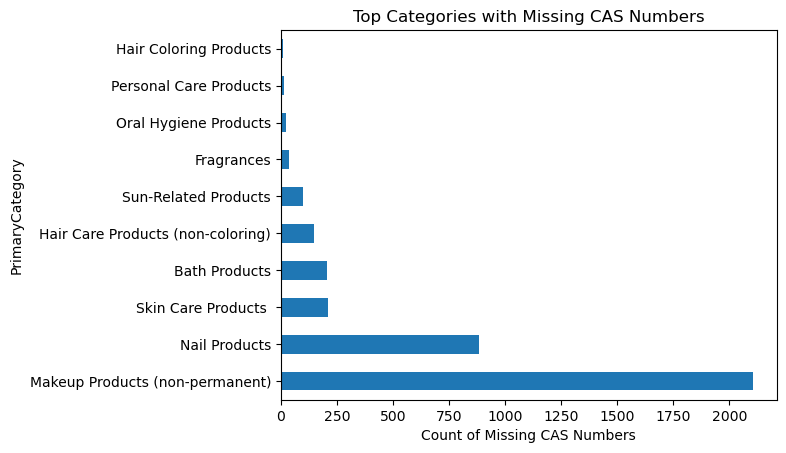

In [347]:
missing_cas_by_cat = newc_df[newc_df['CasNumber'].isna()]['PrimaryCategory'].value_counts().head(10)
missing_cas_by_cat.plot(kind='barh', title='Top Categories with Missing CAS Numbers')
plt.xlabel('Count of Missing CAS Numbers')
plt.show()

### Reporting vs Discontinuation ?

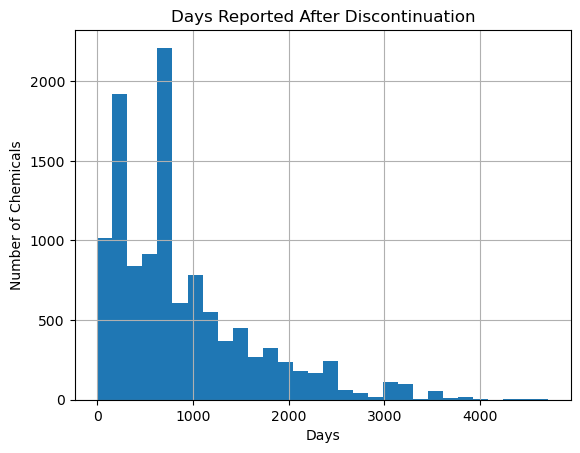

In [352]:
mask = newc_df['DiscontinuedDate'].notna()
late_reports = newc_df[mask & (newc_df['MostRecentDateReported'] > newc_df['DiscontinuedDate'])]
delay_days = (late_reports['MostRecentDateReported'] - late_reports['DiscontinuedDate']).dt.days

delay_days.hist(bins=30)
plt.title('Days Reported After Discontinuation')
plt.xlabel('Days')
plt.ylabel('Number of Chemicals')
plt.show()

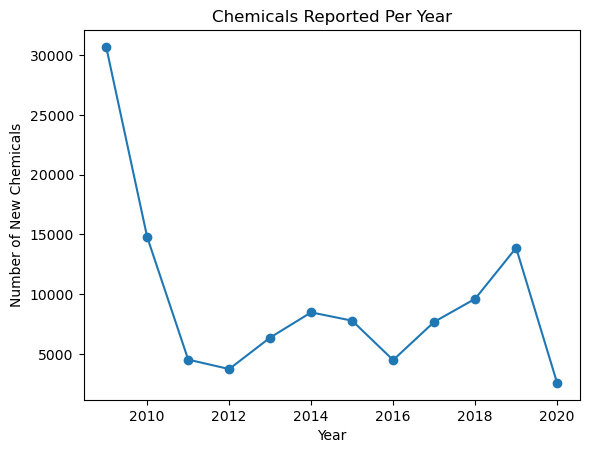

In [354]:
newc_df['YearReported'] = newc_df['InitialDateReported'].dt.year
newc_df['YearReported'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Chemicals Reported Per Year')
plt.xlabel('Year')
plt.ylabel('Number of New Chemicals')
plt.show()

### Top Companies with Most Reported Chemicals

C:\Users\admin\AppData\Local\Temp\ipykernel_15752\470058822.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette='viridis')


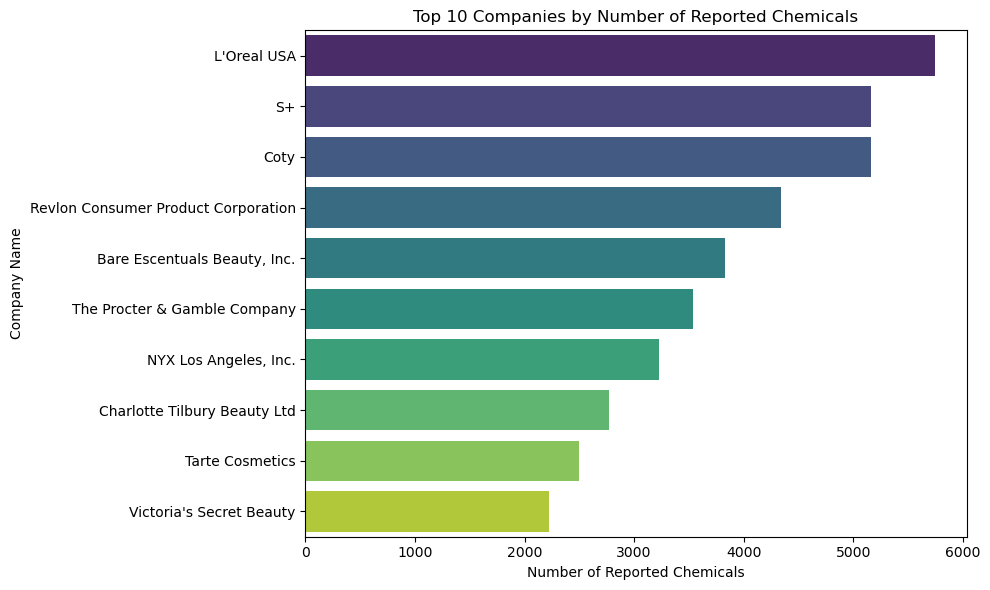

In [358]:
top_companies = newc_df['CompanyName'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='viridis')

plt.title('Top 10 Companies by Number of Reported Chemicals')
plt.xlabel('Number of Reported Chemicals')
plt.ylabel('Company Name')
plt.tight_layout()
plt.show()

### Pie Chart of Product Distribution by Primary Category

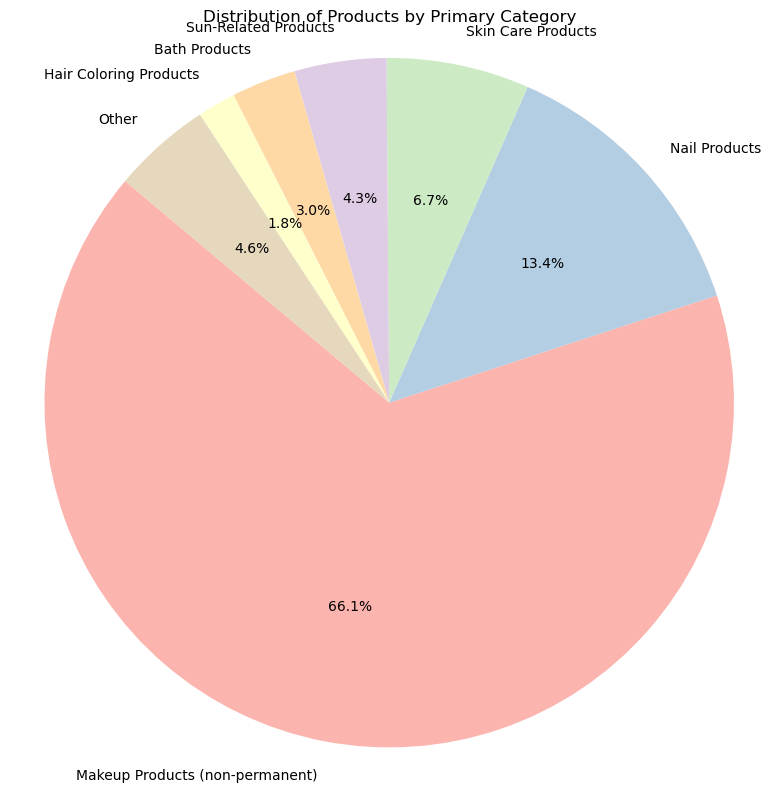

In [366]:
category_counts = newc_df['PrimaryCategory'].value_counts()

top_n = 6
top_categories = category_counts.head(top_n)
other_sum = category_counts[top_n:].sum()
category_labels = list(top_categories.index) + ['Other']
category_sizes = list(top_categories.values) + [other_sum]
plt.figure(figsize=(8, 8))
plt.pie(category_sizes, labels=category_labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Distribution of Products by Primary Category')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
plt.tight_layout()
plt.show()

### Chemical Was Removed After Report

In [371]:
removed_after_report = (
    (newc_df['ChemicalDateRemoved'].notna()) &
    (
        (newc_df['ChemicalDateRemoved'] > newc_df['InitialDateReported']) |
        (newc_df['ChemicalDateRemoved'] > newc_df['MostRecentDateReported'])
    )
)

# Count the number of such records
count_removed_after_report = removed_after_report.sum()

print("Number of chemicals removed after being reported:", count_removed_after_report)

Number of chemicals removed after being reported: 1861


### Chemical Was Removed or Product Discontinued

In [394]:
removed_or_discontinued = (
    newc_df['ChemicalDateRemoved'].notna() |
    newc_df['DiscontinuedDate'].notna()
)

# Count matching records
count_removed_or_discontinued = removed_or_discontinued.sum()

print("Number of chemicals removed or products discontinued:", count_removed_or_discontinued)

Number of chemicals removed or products discontinued: 15485


### The percentage of chemicals removed or discountinued over the total

In [384]:
perce=count_removed_or_discontinued/newc_df.shape[0]*100
print(perce,"%")

13.508090897195446 %


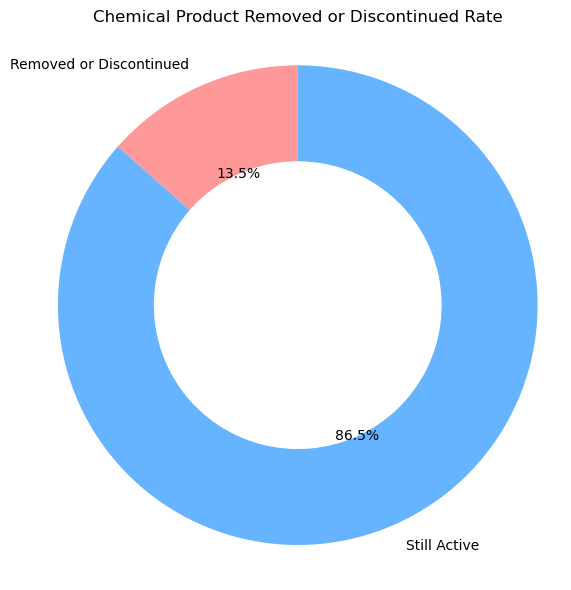

In [390]:
perce = count_removed_or_discontinued / newc_df.shape[0] * 100

# Values for the chart
labels = ['Removed or Discontinued', 'Still Active']
sizes = [perce, 100 - perce]
colors = ['#ff9999','#66b3ff']

# Plot donut chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'width':0.4})
plt.title('Chemical Product Removed or Discontinued Rate')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.tight_layout()
plt.show()